### Natural Language Processing
(NLP) is a subset of Artificial Intelligence where we aim to train computers to understand human languages. Some real-world applications of NLP are chatbots, Siri, and Google Translator. While working on any problem based on NLP, we should follow a process to prepare a vocabulary of words from a textual dataset. So, if you want to understand the process of solving any problem based on NLP, this article is for you. In this article, I will take you through the complete process of NLP using Python.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Process of NLP
To explain the process of NLP, I will take you through the sentiment classification task using Python. The steps to solve this NLP problem are:

Finding a dataset for sentiment classification
Preparing the dataset by tokenization, stopwords removal, and stemming
Text vectorization
Training a classification model for sentiment classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data-Science Edureka/Project/IMDB/IMDB Dataset.csv')

In [ ]:
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


### Step 2: Data Preparation, Tokenization, Stopwords Removal and Stemming
    
Our textual dataset needs preparation before being used for any problem based on NLP. Here we will:

1 remove links and all the special characters from the review column

2 tokenize and remove the stopwords from the review column

3 stem the words in the review column

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['review'] = data['review'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Before moving forward, let’s have a quick look at the wordcloud of the review column:

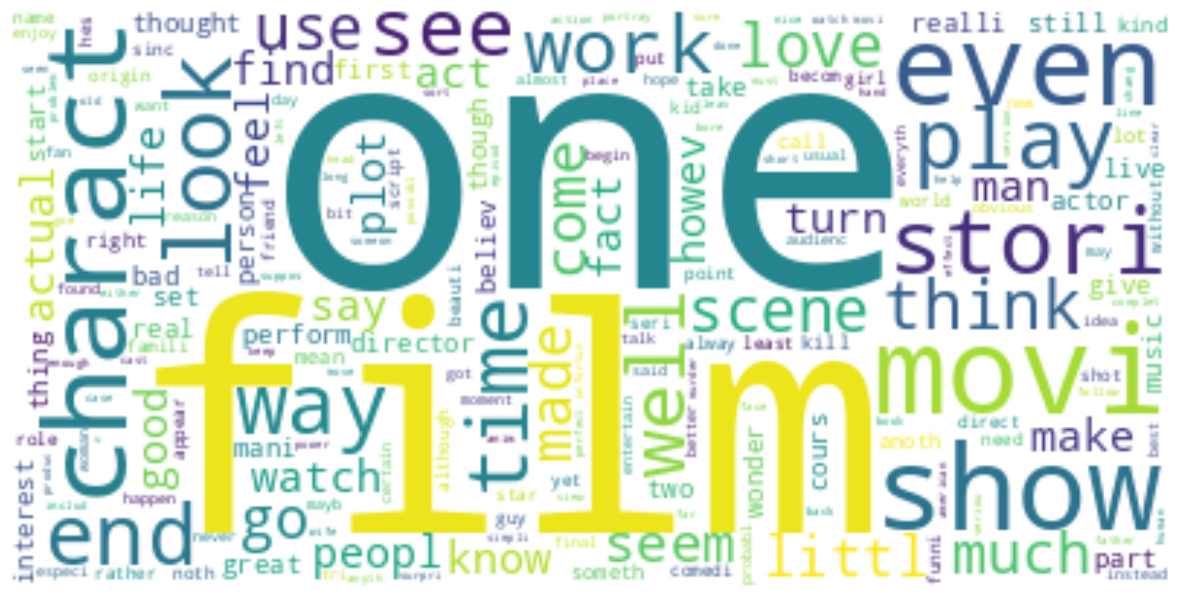

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Step 3: Text Vectorization

The next step is text vectorization. It means to transform all the text tokens into numerical vectors. Here I will first perform text vectorization on the feature column (review column) and then split the data into training and test sets

In [ ]:
x = np.array(data['review'])
y = np.array(data['sentiment'])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                   random_state=42)
     

#### Step 4: Text Classification

The final step in the process of NLP is to classify or cluster texts. As we are working on the problem of sentiment classification, we will now train a text classification model. Here’s how to prepare a text classification model for sentiment classification:

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()
model.fit(X_train,y_train)

PassiveAggressiveClassifier()

#### The dataset we used to train a sentiment classification model contains movie reviews. So let’s test the model by giving a movie review as an input

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: good
['positive']
